In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# df = pd.read_csv('../01_data/01-3_processed/lendingclub_features_for_linear.csv')
# df = pd.read_csv('../01_data/01-3_processed/lendingclub_features_for_RF_XG.csv')
df = pd.read_csv('../data/processed/lendingclub_features_for_lightgbm.csv')


/var/folders/_h/70z4qq3n5p3_x1hqtbcqs_hw0000gn/T/ipykernel_29792/3973482856.py:3: DtypeWarning: Columns (46,56,124,125,126,129,130,131,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/lendingclub_features_for_lightgbm.csv')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860764 entries, 0 to 1860763
Columns: 143 entries, id to sec_app_earliest_cr_line_num
dtypes: float64(113), int64(4), object(26)
memory usage: 2.0+ GB
None


In [5]:
print(df['default'].value_counts(normalize = True))

default
0    0.804929
1    0.195071
Name: proportion, dtype: float64


In [6]:
print(df.describe())

                 id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  1.860764e+06  1.860764e+06  1.860764e+06     1.860764e+06   
mean   7.218278e+07  1.458865e+04  1.458255e+04     1.456505e+04   
std    4.466946e+07  8.970802e+03  8.968155e+03     8.969651e+03   
min    5.473400e+04  5.000000e+02  5.000000e+02     0.000000e+00   
25%    3.769187e+07  7.950000e+03  7.925000e+03     7.800000e+03   
50%    7.217426e+07  1.200000e+04  1.200000e+04     1.200000e+04   
75%    1.076504e+08  2.000000e+04  2.000000e+04     2.000000e+04   
max    1.709797e+08  4.000000e+04  4.000000e+04     4.000000e+04   

               term      int_rate   installment     emp_title    emp_length  \
count  1.860764e+06  1.860764e+06  1.860764e+06  1.000000e+02  1.860764e+06   
mean   4.202537e+01  1.317055e+01  4.402689e+02  5.640684e+06  5.977075e+00   
std    1.040691e+01  4.828412e+00  2.669216e+02  5.537218e+07  3.524130e+00   
min    3.600000e+01  5.310000e+00  4.930000e+00  1.000000e+00  5.000000

In [5]:
nan_ratio = df['installment'].isna().mean()
print(f'installment nan ratio: {nan_ratio:.4%}({nan_ratio:.4f})')

installment nan ratio: 0.0000%(0.0000)


/var/folders/_h/70z4qq3n5p3_x1hqtbcqs_hw0000gn/T/ipykernel_27672/3196079717.py:2: DtypeWarning: Columns (116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../01_data/01-3_processed/lendingclub_features_for_tree.csv')


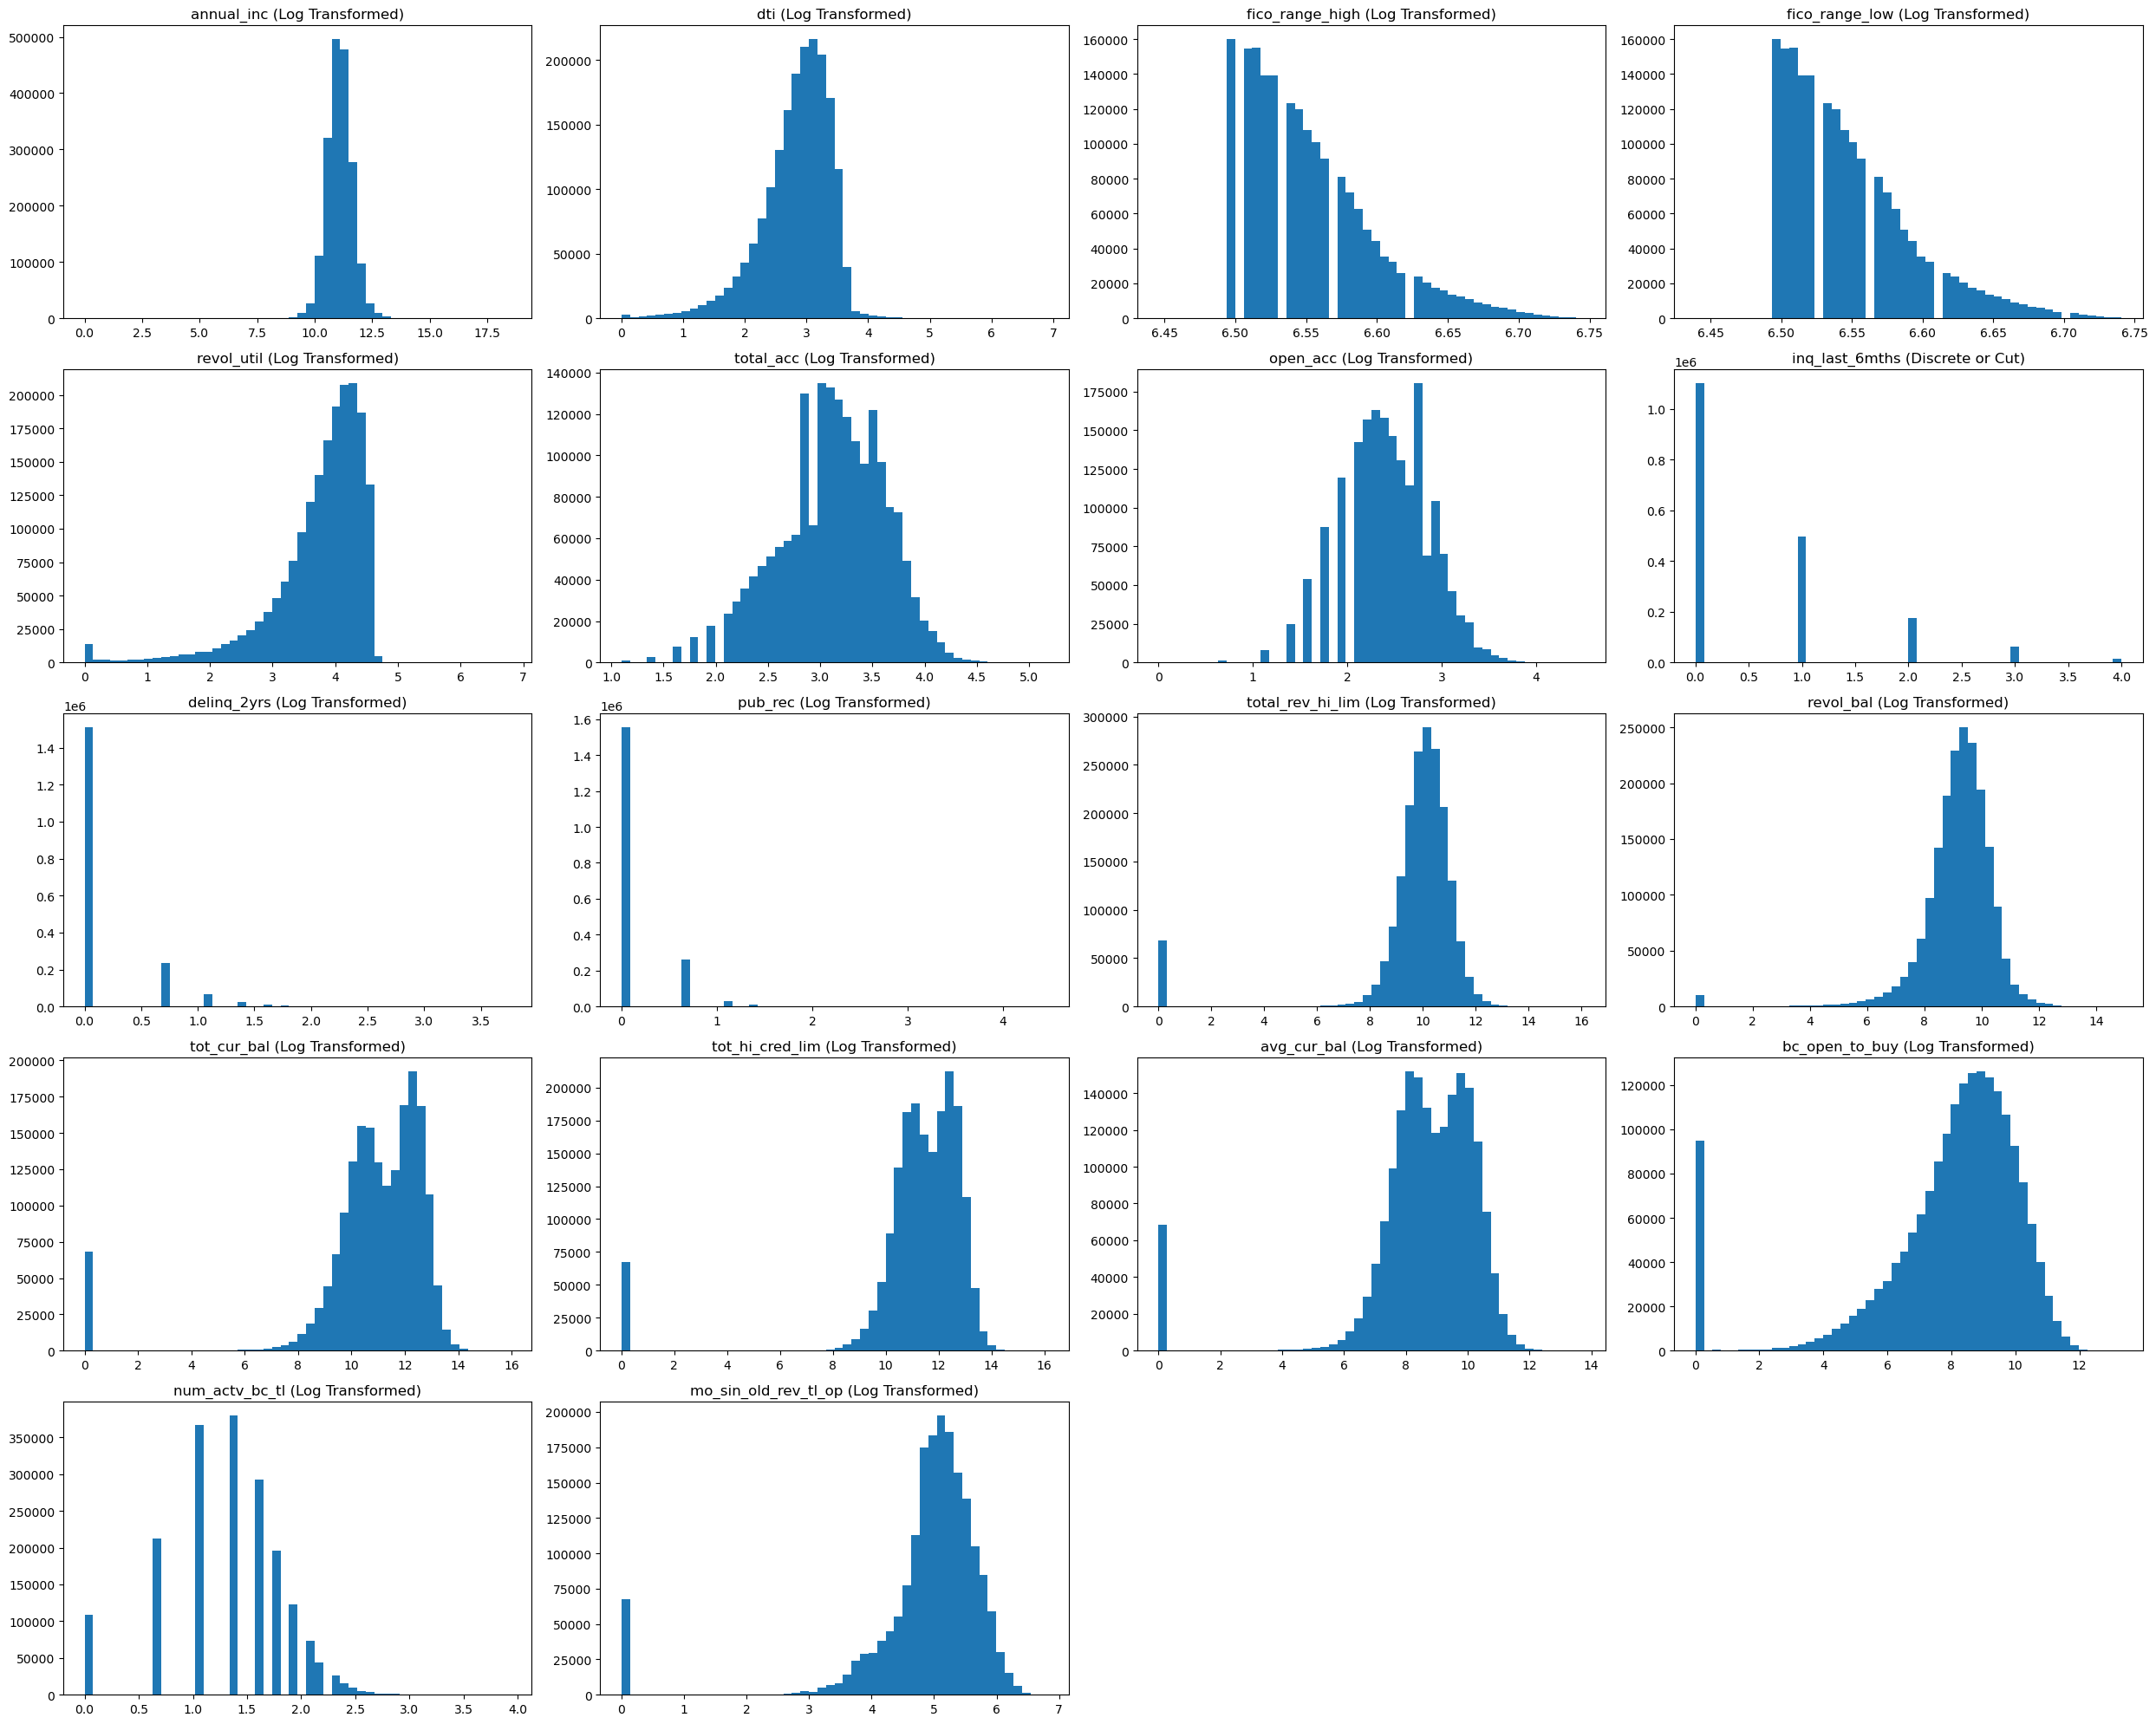

In [17]:
# 데이터 불러오기
df = pd.read_csv('../01_data/01-3_processed/lendingclub_features_for_tree.csv')

important_features = [
    'annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'revol_util',
    'total_acc', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec',
    'total_rev_hi_lim', 'revol_bal', 'tot_cur_bal', 'tot_hi_cred_lim',
    'avg_cur_bal', 'bc_open_to_buy', 'num_actv_bc_tl', 'mo_sin_old_rev_tl_op'
]

# 설정
cut_percentile = 0.99   # 이상치 cut 기준
unique_thresh = 10      # 이산형 구분할 unique 수 기준
var_thresh = 0.001      # 분산이 너무 낮으면 이산형으로 간주

# 플롯
plt.figure(figsize=(25, 20))

for idx, col in enumerate(important_features):
    plt.subplot(5, 4, idx+1)
    
    series = df[col].dropna()

    # 📍 타입 분류 기준
    if (series.nunique() <= unique_thresh) or (series.var() < var_thresh):
        var_type = 'discrete'
    else:
        var_type = 'continuous'

    # 📍 변환
    if var_type == 'continuous':
        safe_col = series[series >= 0]  # 0 이상만
        plt.hist(np.log1p(safe_col), bins=50)
        plt.title(f'{col} (Log Transformed)')

    elif var_type == 'discrete':
        threshold = series.quantile(cut_percentile)
        filtered = series[series <= threshold]
        plt.hist(filtered, bins=50)
        plt.title(f'{col} (Discrete or Cut)')

plt.tight_layout()
plt.show()